<a href="https://colab.research.google.com/github/ohsono/stats414/blob/main/stat414_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import display
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)

# drive.mount('/content/drive')

# %cd /content/drive/MyDrive/stat414
# %ls

In [ ]:
%cd /content/sample_data/


/content/sample_data


In [ ]:
train_ads = pd.read_csv('train_data_ads.csv')
train_ads.head()

,log_id,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,ad_click_list_v001,ad_click_list_v002,ad_click_list_v003,ad_close_list_v001,ad_close_list_v002,ad_close_list_v003,pt_d,u_newsCatInterestsST,u_refreshTimes,u_feedLifeCycle
0,373250,0,100005,3,2,16,147,2,32,6,35,312,2117,7,14339,19319,6,1846,4,46,1,162,47,14,10.0,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,2.022060e+11,39^220^16,0.0,15.0
1,373253,1,100005,3,2,16,147,2,32,6,35,312,2117,7,11923,21714,8,1060,4,37,1,344,20,13,10.0,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,2.022060e+11,39^220^16,0.0,15.0
2,373252,1,100005,3,2,16,147,2,32,6,35,312,2117,7,11923,21714,8,1060,4,37,1,344,20,13,10.0,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,2.022060e+11,39^220^16,0.0,15.0
3,373251,0,100005,3,2,16,147,2,32,6,35,312,2117,7,28665,20163,8,1542,4,47,1,152,49,17,10.0,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,2.022060e+11,39^220^16,0.0,15.0
4,373255,0,100005,3,2,16,147,2,32,6,35,312,2117,7,34041,13608,8,1036,4,44,1,312,43,18,10.0,30157^30648^14278^31706,2066^1776^1036,114^219^312,24107,1218,173,2.022060e+11,39^220^16,0.0,15.0


In [ ]:
# Check for null values in each column
missing_values = train_ads.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]

print(missing_values)

ad_click_list_v002      1
ad_click_list_v003      1
ad_close_list_v001      1
ad_close_list_v002      1
ad_close_list_v003      1
pt_d                    1
u_newsCatInterestsST    1
u_refreshTimes          1
u_feedLifeCycle         1
dtype: int64


In [ ]:
# Split traing data into training and validation sets
df_train, df_val = train_test_split(train_ads, test_size=0.33, random_state=11)

#need to rename label > churn
# y_train = df_train.churn.values
# y_val = df_val.churn.values

# del df_train['churn']
# del df_val['churn']

y_train = df_train.values
y_val = df_val.values

In [ ]:
# Get global mean
train_ads.label.value_counts()

,count
label,
0,7556381
1,119136


In [ ]:
df_train['ad_click_count'] = df_train['ad_click_list_v001'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)

,log_id,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,ad_click_list_v001,ad_click_list_v002,ad_click_list_v003,ad_close_list_v001,ad_close_list_v002,ad_close_list_v003,pt_d,u_newsCatInterestsST,u_refreshTimes,u_feedLifeCycle,ad_click_count
3476484,1026600,0,285193,2,2,41,106,2,16,5,35,240,2231,7,13807,11239,8,2001,5,44,1,162,47,23,0.0,15764,1942,293,24107,1218,173,202206051230,98^171^199^65^10,0,16,1
2094120,70510,0,246919,7,2,44,400,2,30,3,13,272,1199,7,14180,12790,5,1206,3,59,1,213,18,23,0.0,26573^14180^13997^14389^15686,1413^1206^1097^1837^1561,152^322^190^309,24107,1218,173,202206041129,171^169^27^86^78,9,17,5
5619360,14442,0,286747,8,2,30,113,5,11,8,36,302,2117,7,11332,20483,5,1236,3,34,1,213,18,23,0.0,16502^24270^29106,1573^1535^1223,350^168^162,24107,1218,173,202206070939,25^27^112^74^105,5,11,3
7419302,354307,0,239394,9,2,32,108,2,16,5,28,262,2478,7,20072,13082,8,1220,4,54,1,280,49,17,10.0,12537^22491^11508^10445^23445,1730^1146^1913^1611^1867,344^372^309^280^301,24107,1218,173,202206090139,153^17^20^108^16,6,17,5
5893692,450291,0,147248,8,2,13,237,2,30,3,35,319,2117,7,14584,17683,5,1236,3,22,1,213,18,23,0.0,11200^17740^33386^18109^16452,1067^1694^1236^1633^1172,332^162^240^198^312,24107,1218,173,202206080531,78^98^216^112^112,7,17,5


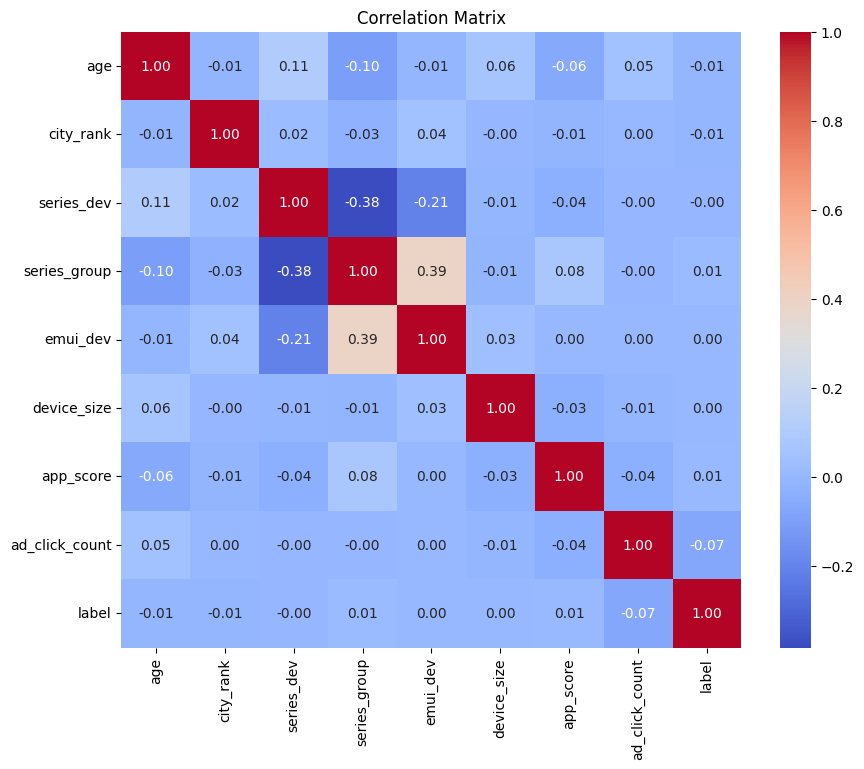

In [ ]:
numerical_features = ['age', 'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_size', 'app_score', 'ad_click_count', 'label']
df_numerical = df_train[numerical_features]
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# # Compute correlation of all columns with 'label'
# correlation_matrix = df_train.corr()

# # Extract correlation of each feature with 'label'
# label_correlation = correlation_matrix['label'].sort_values(ascending=False)

# # Display results
# print(label_correlation)

In [ ]:
# Initialize and train logistic regression model
# sos this cell crashes
model = LogisticRegression()
model.fit(df_train, y_train)

ValueError: could not convert string to float: '17497^33510'

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)